# Random Forest Classifier

In [1]:
# import library packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Given Dataset
data=pd.read_csv('Maternal_Health.csv')

In [4]:
df=data

In [5]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [6]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [7]:
from sklearn.preprocessing import LabelEncoder
label=['RiskLevel']
var=LabelEncoder()
for i in label:
    df[i]=var.fit_transform(df[i]).astype(int)

In [8]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [9]:
# Preprocessing, split test and dataset, split response variable
X=df.drop(labels='RiskLevel',axis=1)
# Response Variable
y=df.loc[:,'RiskLevel']

In [10]:
# Splitting for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)
print('Number of Training Dataset:',len(X_train))
print('Number of Test Dataset:',len(X_test))
print('Total Number of Dataset:',len(X_train)+len(X_test))

Number of Training Dataset: 709
Number of Test Dataset: 305
Total Number of Dataset: 1014


In [11]:
# Implementing Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

In [12]:
# Training
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
predicted=rf.predict(X_test)

In [13]:
# Finding Accuracy
accuracy=accuracy_score(y_test,predicted)
print('Accuracy of Random Forest Classifier',accuracy*100)
predicted_Train=rf.predict(X_train)
accuracy=accuracy_score(y_train,predicted_Train)
print('Training Accuracy of Random Forest Classifier',accuracy*100)

Accuracy of Random Forest Classifier 84.26229508196721
Training Accuracy of Random Forest Classifier 92.3836389280677


In [14]:
# Finding Classification Report
cr=classification_report(y_test,predicted)
print('Classification Report\n\n',cr)

Classification Report

               precision    recall  f1-score   support

           0       0.97      0.90      0.94        82
           1       0.85      0.82      0.83       122
           2       0.75      0.82      0.78       101

    accuracy                           0.84       305
   macro avg       0.86      0.85      0.85       305
weighted avg       0.85      0.84      0.84       305



In [15]:
# Finding Confusion Matrix
cm=confusion_matrix(y_test,predicted)
print('Confusion Matrix\n\n',cm)

Confusion Matrix

 [[ 74   2   6]
 [  0 100  22]
 [  2  16  83]]


In [23]:
import numpy as n
n.array(y_test)

array([0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2,
       2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1,
       0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0,
       2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0,
       0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2,
       0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2,
       0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1,
       2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2,

In [20]:
predicted

array([0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0,
       2, 0, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0,
       2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0,
       0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2,

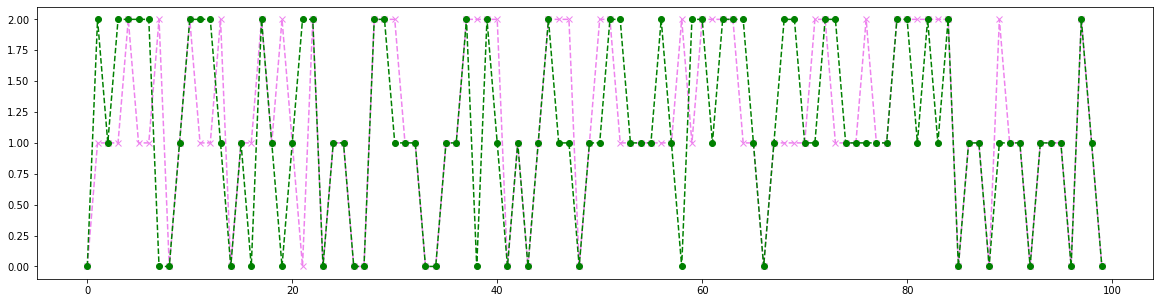

In [17]:
df2=pd.DataFrame()
df2['y_test']=y_test
df2['predicted']=predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.plot(df2['predicted'][:100],marker='x',linestyle='dashed',color='violet')
plt.plot(df2['y_test'][:100],marker='o',linestyle='dashed',color='green')
plt.show()

In [24]:
import joblib
joblib.dump(rf,'Maternal.pkl')

['Maternal.pkl']

In [32]:
b=[[35,120,60,6.1,98.0,76]]
prediction_data=n.array(b)
predict=rf.predict(prediction_data)
predict

array([1])